# Part 1: Preprocessing

In [86]:
import string

text = ""

for filename in ['bible.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
def tokenizer(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    token = text.split()
    return token

tokens = tokenizer(text)

In [87]:
# Calculate term frequency
term_freq = {}
for term in tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1

# Descending order
term_freq_desc = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)

rank = []
freq = []
for i in term_freq_desc:
    rank.append(i[0])
    freq.append(i[1])

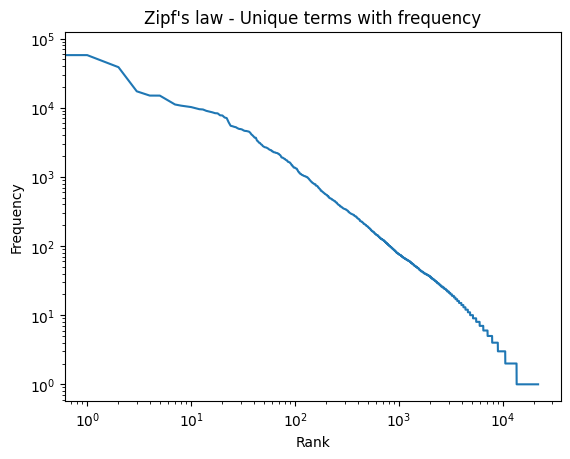

In [88]:
import matplotlib.pyplot as plt

plt.plot(rank, freq)
plt.title("Zipf's law - Unique terms with frequency")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

In [89]:
# Heap frequency
terms = []
counter = {}
counter_list = []
count = 0
n = 0

for word in tokens:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
        count += 1
    terms.append(word)
    counter_list.append(count)
    n += 1

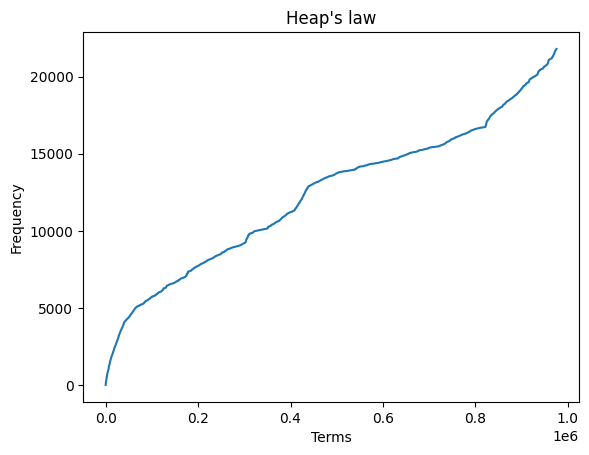

In [90]:
plt.plot(range(0, n), counter_list)

plt.title("Heap's law")
plt.xlabel("Terms")
plt.ylabel("Frequency")


plt.show()

In [91]:
from nltk.stem import PorterStemmer

# Read stopwords from the custom stoplist file
custom_stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        custom_stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in custom_stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:200])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'king', 'jame', 'version', 'bibl', 'ebook', 'is', 'use', 'anywher', 'unit', 'state', 'most', 'part', 'world', 'cost', 'restrict', 'may', 'copi', 'give', 'reus', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'wwwgutenbergorg', 'are', 'locat', 'unit', 'state', 'will', 'check', 'law', 'countri', 'are', 'locat', 'use', 'ebook', 'titl', 'king', 'jame', 'version', 'bibl', 'releas', 'date', 'august', '1', '1989', 'ebook', '10', 'most', 'recent', 'updat', 'may', '1', '2023', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'king', 'jame', 'version', 'bibl', 'old', 'testament', 'king', 'jame', 'version', 'bibl', 'first', 'book', 'mose', 'call', 'genesi', 'second', 'book', 'mose', 'call', 'exodu', 'third', 'book', 'mose', 'call', 'leviticu', 'fourth', 'book', 'mose', 'call', 'number', 'fifth', 'book', 'mose', 'call', 'deuteronomi', 'book', 'joshua', 'book', 'judg', 'book', 'ruth', 'first', 'book', 'samuel', 'se

In [92]:
# Save preprocessed tokens to new files
with open('bible_preprocessed.txt', 'w', encoding='utf-8') as bible_file:
    bible_file.write(" ".join(stemmed_tokens))

with open('quran_preprocessed.txt', 'w', encoding='utf-8') as quran_file:
    quran_file.write(" ".join(stemmed_tokens))

Compare the processed file to the new file. Are there any surprises? Discuss
what kind of modifications in preprocessing could be applied. For example:
- Additional words/terms to be filtered out
- Special tokenization
- Additional normalization to some terms

In [96]:
new_text = ""

for filename in ['amuzgo.txt', 'maori.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        new_text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
new_tokens = tokenizer(new_text)